In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import pyodbc

db_url = 'mssql+pyodbc://LAVANYA-PC/telecomDB?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(db_url)

query = 'SELECT * FROM telecomDB.dbo.[CommEvents(2-28-20)]'
df = pd.read_sql(query, engine)

In [8]:
df

,epochtime,date,time,dayofweek,insession,studyweek,studyday,egoid,egoconf,alterid,alterconf,outgoing,iphone,eventtype,eventtypedetail,messagetype,duration,length,bytes
0,1420088400000,2015-01-01,00:00:00,Thursday,No,-33,-227,27169,.94999999,2250922,.60000002,No,1,SMS,iM,,,13,
1,1420088401000,2015-01-01,00:00:01,Thursday,No,-33,-227,96184,.94999999,738850,.69999999,No,1,WhatsApp,DM,T,,1,
2,1420088403000,2015-01-01,00:00:03,Thursday,No,-33,-227,96184,.94999999,738850,.69999999,No,1,WhatsApp,DM,T,,1,
3,1420088405000,2015-01-01,00:00:05,Thursday,No,-33,-227,19538,.94999999,270980,.5,No,1,SMS,iM,,,12,
4,1420088406000,2015-01-01,00:00:06,Thursday,No,-33,-227,96184,.94999999,738850,.69999999,No,1,WhatsApp,DM,T,,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1420088541000,2015-01-01,00:02:21,Thursday,No,-33,-227,54098,.94999999,2300721,.60000002,Yes,1,SMS,iM,,,35,
96,1420088542000,2015-01-01,00:02:22,Thursday,No,-33,-227,98624,.94999999,203796,.69999999,No,1,SMS,SM,,,36,
97,1420088544000,2015-01-01,00:02:24,Thursday,No,-33,-227,96543,.94999999,347378,.69999999,Yes,1,SMS,iM,,,53,
98,1420088544000,2015-01-01,00:02:24,Thursday,No,-33,-227,69124,.94999999,208943,.69999999,Yes,1,SMS,iM,,,15,


c:\users\ahuja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  # Remove the CWD from sys.path while we load stuff.


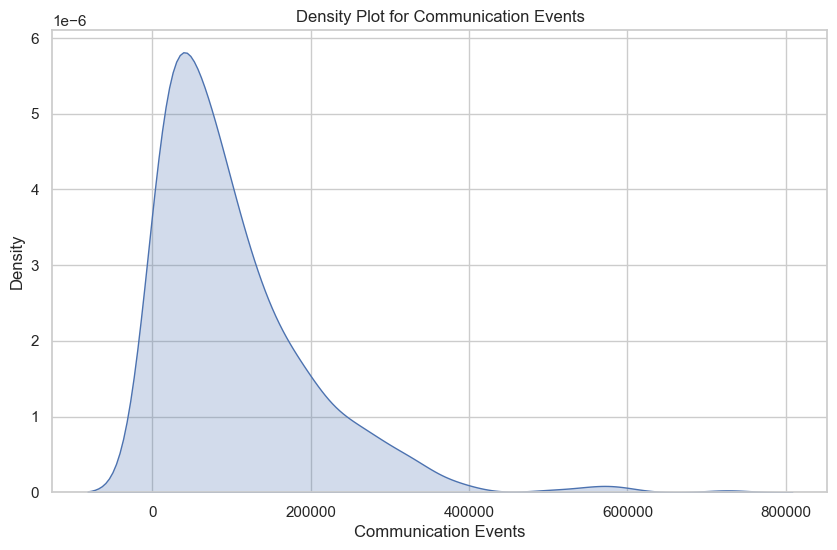

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('CommunicationEventsForEachEgoID.csv')

# Create a density plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='communication_events', fill=True, common_norm=True, palette="crest")

# Set plot labels and title
plt.xlabel("Communication Events")
plt.ylabel("Density")
plt.title("Density Plot for Communication Events")

# Show the plot
plt.show()


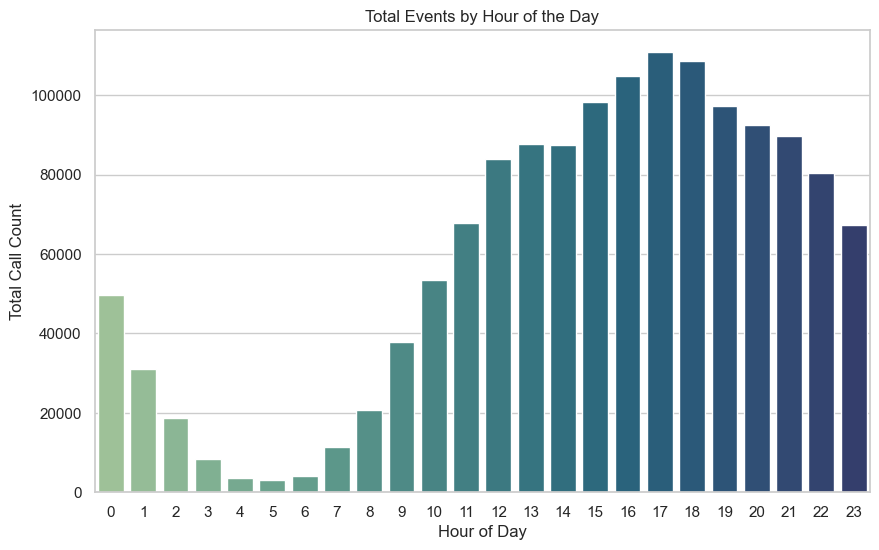

In [16]:
df_calls = pd.read_csv('EgoIDCallRecordsSortedwithHour.csv')
df_total_calls = df_calls.groupby('hour_of_day')['call_count'].sum().reset_index()

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='hour_of_day', y='call_count', data=df_total_calls, palette="crest")


# Set plot labels and title
plt.xlabel("Hour of Day")
plt.ylabel("Total Call Count")
plt.title("Total Events by Hour of the Day")

# Show the plot
plt.show()

In [ ]:
import pandas as pd

df = pd.read_sql('SELECT egoid, alterid, timestamp, length, duration, bytes, outgoing FROM [CommEvents(2-28-20)]', engine)
df = pd.read_csv('SELECTIVEColumnsCommunicationEvents.csv')
df.columns

In [15]:
df['egoid'].unique()

array([60493, 43794, 67993, 59097, 93471, 67574, 78783, 17522, 69057,
       27141, 28653, 65072, 96543, 21971, 97448, 76485, 92552, 60396,
       70492, 98766, 49086, 57359, 82269, 96689, 14690, 64232, 92716,
       48154, 47024, 66061, 45641, 28327, 51851, 47810, 33009, 10237,
       17308, 38293, 24833, 49800, 40021, 95559, 22989, 38824, 35011,
       98462, 46365, 37404, 43710, 31175, 97021, 19538, 52848, 43809,
       71836, 72806, 68404, 75438, 24883, 91429, 36574, 34062, 72912,
       62617, 25125, 44344, 58682, 55569, 69831, 92515, 87330, 93485,
       57443, 89710, 67709, 77711, 45963, 15181, 50766, 26857, 92038,
       54098, 43177, 89142, 46373, 77941, 96613, 39285, 76790, 38052,
       23253, 22913, 78657, 12156, 22408, 38826, 82248, 73962, 77872,
       22897, 64157, 94862, 31439, 85503, 25197, 95490, 68679, 64302,
       22455, 72885, 33239, 18111, 36117, 53776, 23696, 82587, 35031,
       48676, 36963, 62246, 77838, 36875, 63419, 13486, 52123, 33657,
       96828, 16654,

In [5]:
data = df[(df['timestamp'] == '2019-04-01 11:34:41.000')]
data = df[(df['egoid'] == 10237) & (df['alterid'] == 34467)]
data

,egoid,alterid,timestamp,length,eventtype,duration,bytes,outgoing
8775172,10237,34467,2015-08-18 18:31:31.000,13.0,SMS,NaN,NaN,No
8965643,10237,34467,2015-08-21 13:19:36.000,50.0,SMS,NaN,NaN,No
11186728,10237,34467,2015-09-19 11:53:53.000,80.0,SMS,NaN,NaN,No
11191511,10237,34467,2015-09-19 12:47:52.000,138.0,SMS,NaN,NaN,No
11219353,10237,34467,2015-09-19 20:40:07.000,22.0,SMS,NaN,NaN,No
...,...,...,...,...,...,...,...,...
55125773,10237,34467,2018-08-23 19:15:52.000,49.0,SMS,NaN,NaN,No
55125807,10237,34467,2018-08-23 19:23:04.000,12.0,SMS,NaN,NaN,No
55125808,10237,34467,2018-08-23 19:23:07.000,13.0,SMS,NaN,NaN,No
55125809,10237,34467,2018-08-23 19:23:10.000,13.0,SMS,NaN,NaN,No


In [17]:
# sample data for one pair of egoid-alterid
iltered_data = df[(df['egoid'] == 10237) & (df['alterid'] == 10237)]
iltered_data

,egoid,alterid,timestamp,length,eventtype,duration,bytes,outgoing
132,10237,2107540,2015-01-01 00:02:56.000,19.0,SMS,NaN,NaN,No
334,10237,970860,2015-01-01 00:06:59.000,16.0,SMS,NaN,NaN,No
424,10237,970860,2015-01-01 00:09:07.000,20.0,SMS,NaN,NaN,Yes
428,10237,2107540,2015-01-01 00:09:18.000,14.0,SMS,NaN,NaN,Yes
459,10237,2973482,2015-01-01 00:09:29.000,19.0,SMS,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...
57380150,34467,10237,2019-04-01 11:34:41.000,48.0,SMS,NaN,NaN,No
57380156,34467,10237,2019-04-01 11:34:51.000,29.0,SMS,NaN,NaN,No
57380164,34467,10237,2019-04-01 11:35:06.000,85.0,SMS,NaN,NaN,No
57383727,34467,10237,2019-04-01 16:20:47.000,49.0,SMS,NaN,NaN,No


In [5]:
# Creating different csv files for each egoid and egoid_alterid pair
import pandas as pd
import warnings

# Filter out the SettingWithCopyWarning
warnings.filterwarnings("ignore")
i=1
str = "egoid; alterid; eventtime; eventtype; duration; outgoing"
# Iterate over each unique egoid
for egoid in (32668,24883,55533,67177,88882,66800,32404,63122,49497,22093,38815,43114,96828,56058,31033,92340,11148,74632,92412,67608,78407,80484,90646,22143,36117,14301,52123,28247,86440,73158,74413,30814,66815,16819,64572,77872,17470,55881,24079,22913,93856,72885,22540,38052,62617,59900,73897,54435,64058,43710,36963,39146,14250,28724,65072,90079,77187,48154,75149,88967,29647,58682,25369,87328,56480,11402,59355,98766,57443,35011,82819,19735,24833,36385,63347,42513,39414,88185,93766,74899,18111,59863,44927,70566,25548,44873,48676,83470,79167,36875,79897,84390,47584,71894,70962,31538,79731,24898,87330,92895,40864,69217,23487,44344,13486,35925,37404,64090,46365,93858,53518,61084,33341,58654,73143,34525,95490,91551,79607,92552,92716,18707,14847,58633,84011,96469,78657,77838,29354,43809,25172,32919,38293,26320,76785,68318,14690,74845,67106,33785,62246,47142,26272,35180,63138,10469,28327,93246,85453,79352,29296,29885,87664,56527,27407,95559,26858,94455,21909,38824,39659,80429,11454,12738,49010,17020,93787,60963,83612,58793,38683,46418,11002,93699,23518,14511,28254,59592,91176,93462,47024,50666,43794,66629,10547,54837,60230,99978,26581,20507,48013,77036,75578,46266,22688,92028,32037,89165,42646,84502,57842,51495,20650,73577,39738,25197,66061,19591,47498,50976,46151,94579,68050,91313,39129,88582,92566,60216,39564,83542,64075,89161,29134,43603,61028,48946,21932,89607,35872,86265,72570,93002,66676,66047,83748,61659,38313,98117,15134,50072,91932,77941,92953,97050,28824,81647,77789,98760,46558,22408,91429,32976,95585,71193,24029,22455,84768,60367,19030,22066,74492,87192,41167,97833,42773,87032,51723,67334,75341,22460,21899,60008,77532,81420,22587,49800,49014,44070,89142,76663,82728,80980,74285,14737,94215,25125,29792,69807,27306,49539,30972,11128,24016,21793,47886,12029,17569,42137,39787,83005,94641,88008,21887,36384,73452,54030,70745,36038,33953,22119,33388,20335,93504,44310,56543,35824
              ):
    # Filter data for the current egoid
    filtered_data = df[(df['egoid'] == egoid) | (df['alterid'] == egoid)]

    # Create a new column 'duration' for Call events and set to 0 for other event types
    filtered_data['duration'] = filtered_data.apply(lambda row: row['duration'] if row['eventtype'] == 'Call' else 0, axis=1)

    # Replace NaN values and apply transformations
    # filtered_data['length'] = filtered_data.apply(lambda row: 0 if pd.isna(row['length']) else row['length'], axis=1)
    filtered_data['eventtype'] = filtered_data['eventtype'].apply(lambda x: 1 if x == 'Call' else 0)
    filtered_data['outgoing'] = filtered_data['outgoing'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Concatenate values into a single column
    filtered_data[str] = filtered_data.apply(
        lambda row: f"{row['egoid']};{row['alterid']};{row['timestamp']};{row['eventtype']};{row['duration']};{row['outgoing']}",
        axis=1
    )
    
    # Create a CSV file for the current egoid with headers
    csv_filename = f'telcodata_{egoid}.csv'
    filtered_data[str].to_csv(csv_filename, index=False, header=True, mode='w')
    print(f'Processed telcodata_{egoid}.csv and {i} egoid(s).')
    i = i+1


Processed telcodata_32668.csv and 1 egoid(s).
Processed telcodata_24883.csv and 2 egoid(s).
Processed telcodata_55533.csv and 3 egoid(s).
Processed telcodata_67177.csv and 4 egoid(s).
Processed telcodata_88882.csv and 5 egoid(s).
Processed telcodata_66800.csv and 6 egoid(s).
Processed telcodata_32404.csv and 7 egoid(s).
Processed telcodata_63122.csv and 8 egoid(s).
Processed telcodata_49497.csv and 9 egoid(s).
Processed telcodata_22093.csv and 10 egoid(s).
Processed telcodata_38815.csv and 11 egoid(s).
Processed telcodata_43114.csv and 12 egoid(s).
Processed telcodata_96828.csv and 13 egoid(s).
Processed telcodata_56058.csv and 14 egoid(s).
Processed telcodata_31033.csv and 15 egoid(s).
Processed telcodata_92340.csv and 16 egoid(s).
Processed telcodata_11148.csv and 17 egoid(s).
Processed telcodata_74632.csv and 18 egoid(s).
Processed telcodata_92412.csv and 19 egoid(s).
Processed telcodata_67608.csv and 20 egoid(s).
Processed telcodata_78407.csv and 21 egoid(s).
Processed telcodata_80

In [ ]:

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['SenderID', 'ReceiverID', 'EventTime', 'EventType', 'EventLength'])
i = 1
# Iterate over each unique egoid
for egoid in df['egoid'].unique():
    # Filter data for the current egoid
    filtered_data = df[(df['egoid'] == egoid) | (df['alterid'] == egoid)]

    # Determine sender and receiver based on 'outgoing' column
    filtered_data['SenderID'] = filtered_data.apply(lambda row: egoid if row['outgoing'] == 'Yes' else row['alterid'], axis=1)
    filtered_data['ReceiverID'] = filtered_data.apply(lambda row: row['alterid'] if row['outgoing'] == 'Yes' else egoid, axis=1)
    filtered_data['length'] = filtered_data.apply(lambda row: row['duration'] if row['eventtype'] == 'Call' else row['length'], axis= 1)
    filtered_data['eventtype'] = filtered_data.apply(lambda row: 1 if row['eventtype'] == 'Call' else 0, axis=1)
    
    # Select only the required columns
    selected_columns = ['SenderID', 'ReceiverID', 'timestamp', 'eventtype', 'length']
    filtered_data = filtered_data[selected_columns]

    # Rename columns to match the desired output
    filtered_data.columns = ['SenderID', 'ReceiverID', 'EventTime', 'EventType', 'EventLength']
    csv_filename = f'telcodata_{egoid}.csv'
    filtered_data.to_csv(csv_filename, sep=';', index=False)
    print(f'Processed telcodata_{egoid}.csv and {i} egoid(s).')
    i = i+1



In [5]:
import pandas as pd

# Load your data from the SQL table into a pandas DataFrame
# Replace 'your_table_name' with the actual name of your table
df = pd.read_sql('SELECT  top 10 * FROM SMSEvents order by timestamp desc', engine)
df

,timestamp,egoid,alterid,time_difference,length,bytes,outgoing
0,2019-05-19 23:57:13,33239,64978,1312,12.0,0,No
1,2019-05-19 23:53:18,66676,2194015,116,65.0,0,No
2,2019-05-19 23:52:38,66676,484339,1295,51.0,0,No
3,2019-05-19 23:51:56,66676,484339,1295,44.0,0,Yes
4,2019-05-19 23:51:47,66676,484339,1295,12.0,0,Yes
5,2019-05-19 23:51:30,66676,2194015,116,105.0,0,Yes
6,2019-05-19 23:50:43,14847,743602,1484,0.0,0,Yes
7,2019-05-19 23:49:36,66676,513037,1370,64.0,0,No
8,2019-05-19 23:49:07,66676,2194015,116,42.0,0,No
9,2019-05-19 23:44:08,93002,250498,992,9.0,0,No


In [ ]:
import os
# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['SenderID', 'ReceiverID', 'EventTime', 'EventType', 'EventLength'])
sms_reader = pd.read_sql(f'SELECT * FROM SMSEvents', engine, chunksize=1000000)

for chunk in sms_reader:
    # Iterate over each unique egoid
    for egoid in df['egoid'].unique():
        # Filter data for the current egoid
        filtered_data = df[(df['egoid'] == egoid) | (df['alterid'] == egoid)]
    
        # Determine sender and receiver based on 'outgoing' column
        filtered_data['SenderID'] = filtered_data.apply(lambda row: egoid if row['outgoing'] == 'Yes' else row['alterid'], axis=1)
        filtered_data['ReceiverID'] = filtered_data.apply(lambda row: row['alterid'] if row['outgoing'] == 'Yes' else egoid, axis=1)
    
        filtered_data['eventtype'] = '0'
        filtered_data['length'] = df.apply(lambda row: row['length'] if row.get('length', 0) > 0 else row.get('bytes', 0), axis=1)


        # Select only the required columns
        selected_columns = ['SenderID', 'ReceiverID', 'timestamp', 'eventtype', 'length']
        filtered_data = filtered_data[selected_columns]
    
        # Rename columns to match the desired output
        filtered_data.columns = ['SenderID', 'ReceiverID', 'EventTime', 'EventType', 'EventLength']
        csv_filename = f'telcodata_{egoid}.csv'
        if os.path.exists(csv_filename):
            # Load telcodata file and append SMS events
            df_telcodata = pd.read_csv(csv_filename, sep=';')
            df_telcodata = pd.concat([df_telcodata, filtered_data])
        else:
            # Create a new DataFrame for telcodata with SMS events
            df_telcodata = filtered_data

        # Save the updated telcodata file
        df_telcodata.to_csv(csv_filename, sep=';', index=False)

